In [1]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
from matplotlib import rcParams

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [97]:
matplotlib.style.use('ggplot')

In [2]:
ds = pd.read_csv('../VALUE_FULL_puwait.csv', header = 0)

In [3]:
ds.columns.values

array(['Unnamed: 0', 'medallion', 'pu_time', 'do_time', 'pu_lon', 'pu_lat',
       'do_lon', 'do_lat', 'tot_amount', 'duration', 'wait_seconds',
       'trip_value'], dtype=object)

In [4]:
ds = ds.drop('Unnamed: 0',axis=1)

In [6]:
ds = ds[ds.wait_seconds<3600] #more than 1h wait is quite certainly a stop

In [7]:
ds['pu_time'] = pd.to_datetime(ds['pu_time'])
ds['do_time'] = pd.to_datetime(ds['do_time'])

In [8]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,wait_seconds,trip_value
0,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:39:16,2013-01-01 00:58:43,-73.948524,40.778000,-73.978966,40.780052,19.200000,1166,89,55.075697
1,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:59:38,2013-01-01 01:05:59,-73.979164,40.780136,-73.961884,40.774754,9.491658,380,55,78.551651
2,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:07:33,2013-01-01 01:19:52,-73.962669,40.775368,-73.956116,40.804432,16.475258,738,94,71.287175
3,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:21:23,2013-01-01 01:56:09,-73.955887,40.804317,-74.000214,40.721714,32.770326,2085,91,54.215613
4,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:57:45,2013-01-01 02:16:48,-74.002373,40.719803,-73.973053,40.792763,28.600000,1142,96,83.166397


In [9]:
holidays = [1,21,5,6,12,13,19,20,26,27]

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
sample = ds.sample(1000)
sample['hour'] = sample.pu_time.map(lambda x: x.hour)
sample['holiday'] = sample.pu_time.map(lambda x: int(x.day in holidays)) #1=holiday, 0=workday
sample['weekday'] = sample.pu_time.map(lambda x: x.weekday()) #from 0 to 6

In [76]:
X = pd.concat([sample.hour,sample.weekday,sample.holiday],1).as_matrix()
y= sample.trip_value.as_matrix()

In [77]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [78]:
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [80]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.799014)
2. feature 1 (0.179701)
3. feature 2 (0.021285)


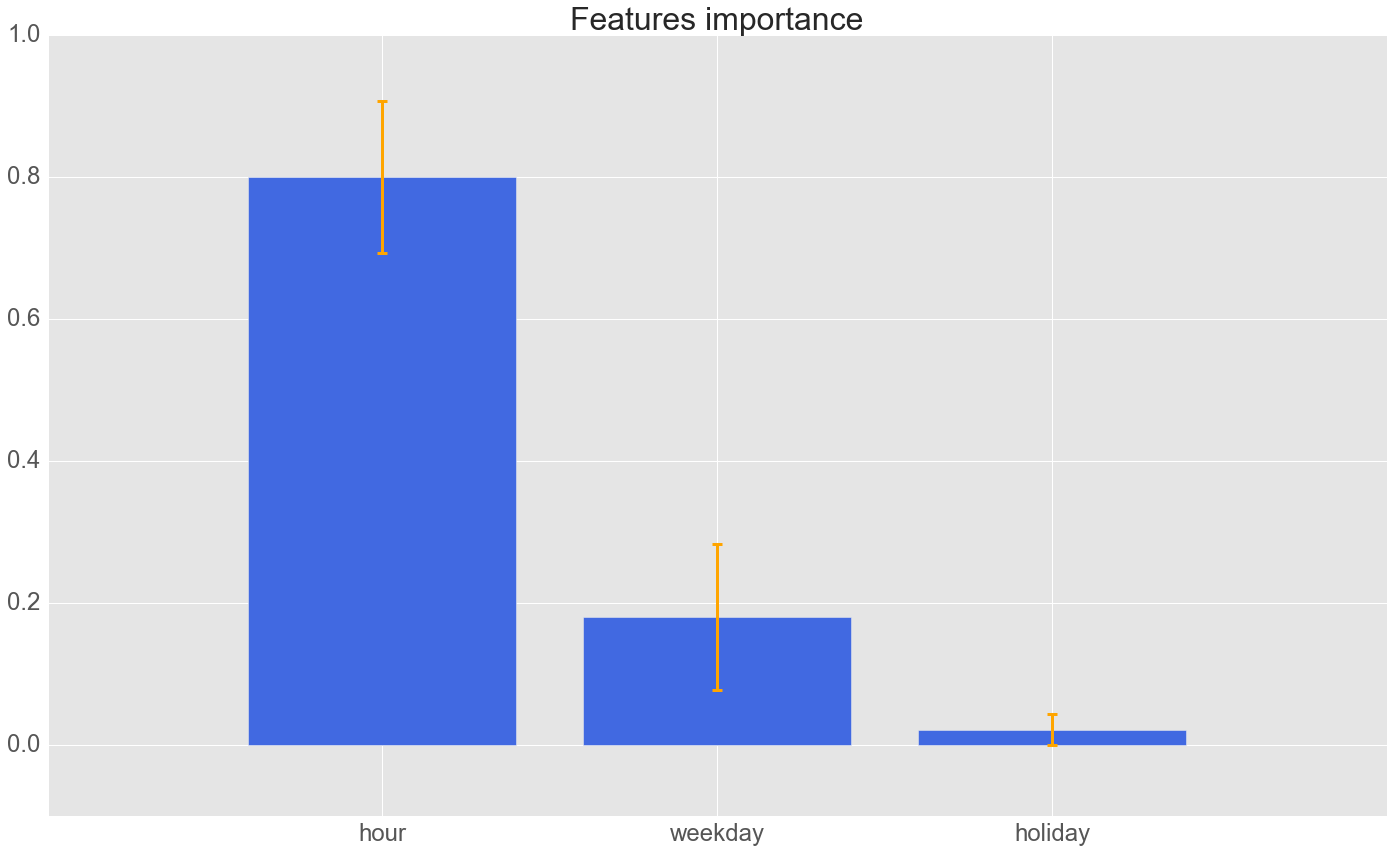

In [176]:
rcParams['figure.figsize'] = (24,14)

# Plot the feature importances of the forest
plt.figure()
plt.title("Features importance", fontsize = 32)
plt.bar(range(X.shape[1]), importances[indices],
       color="royalblue", yerr=std[indices], align="center",error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
plt.xticks(range(X.shape[1]), ['hour','weekday','holiday'],fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlim([-1, X.shape[1]])
plt.ylim([-.1,1])
plt.show()

In [19]:
len(ds)

10273145

In [51]:
'''I wanted to check the importance of medallion number, but in a sample of 1000 trips they are mainly all different
    cabs, skewing the statistics'''
a = {}
for i in range(len(sample.medallion.tolist())):
#    print i
    x = sample.medallion.tolist()[i]
#    print x
    if x not in a:
        a[x] = i
        sample.loc[sample.medallion == sample.medallion.tolist()[i], 'medallion'] = i
#        print a[x]
#        sample.medallion.tolist()[i]
    else:
        pass

In [52]:
sample.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,wait_seconds,trip_value,hour,holiday
3411234,0,2013-01-18 22:18:38,2013-01-18 22:28:39,-73.982056,40.778896,-73.957207,40.771706,13.75,600,489,45.454545,22,0
1171718,1,2013-01-13 17:08:00,2013-01-13 17:21:00,-74.014740,40.718044,-73.977524,40.733994,20.00,780,1140,37.500000,17,1
6819813,2,2013-01-29 19:03:42,2013-01-29 19:13:39,-73.975494,40.749741,-73.980049,40.765877,12.00,597,86,63.250366,19,0
5006160,3,2013-01-07 05:42:00,2013-01-07 05:50:00,-73.969536,40.753471,-73.993195,40.749748,10.50,480,180,57.272727,5,0
6741599,4,2013-01-18 12:10:00,2013-01-18 12:18:00,-73.989113,40.748077,-73.972755,40.758381,9.00,480,180,49.090909,12,0


In [53]:
sample.medallion.nunique()

961

In [20]:
bythehour = ds.groupby([ds.pu_time.map(lambda x: x.hour),pd.cut(ds.pu_lat,150),pd.cut(ds.pu_lon,150)])
new_bth = bythehour.aggregate({'trip_value':lambda x: x.mean() if x.count()>20 else np.nan}).reset_index()

In [190]:
def facet(data,color,**kws):
    data = data.pivot(index='pu_lat', columns='pu_lon', values='trip_value').iloc[::-1]
    g = sns.heatmap(data, cmap='YlOrRd', **kws)
    g.axes.get_yaxis().set_visible(False)
    g.axes.get_xaxis().set_visible(False)
    g.patch.set_facecolor('#e6eeff')

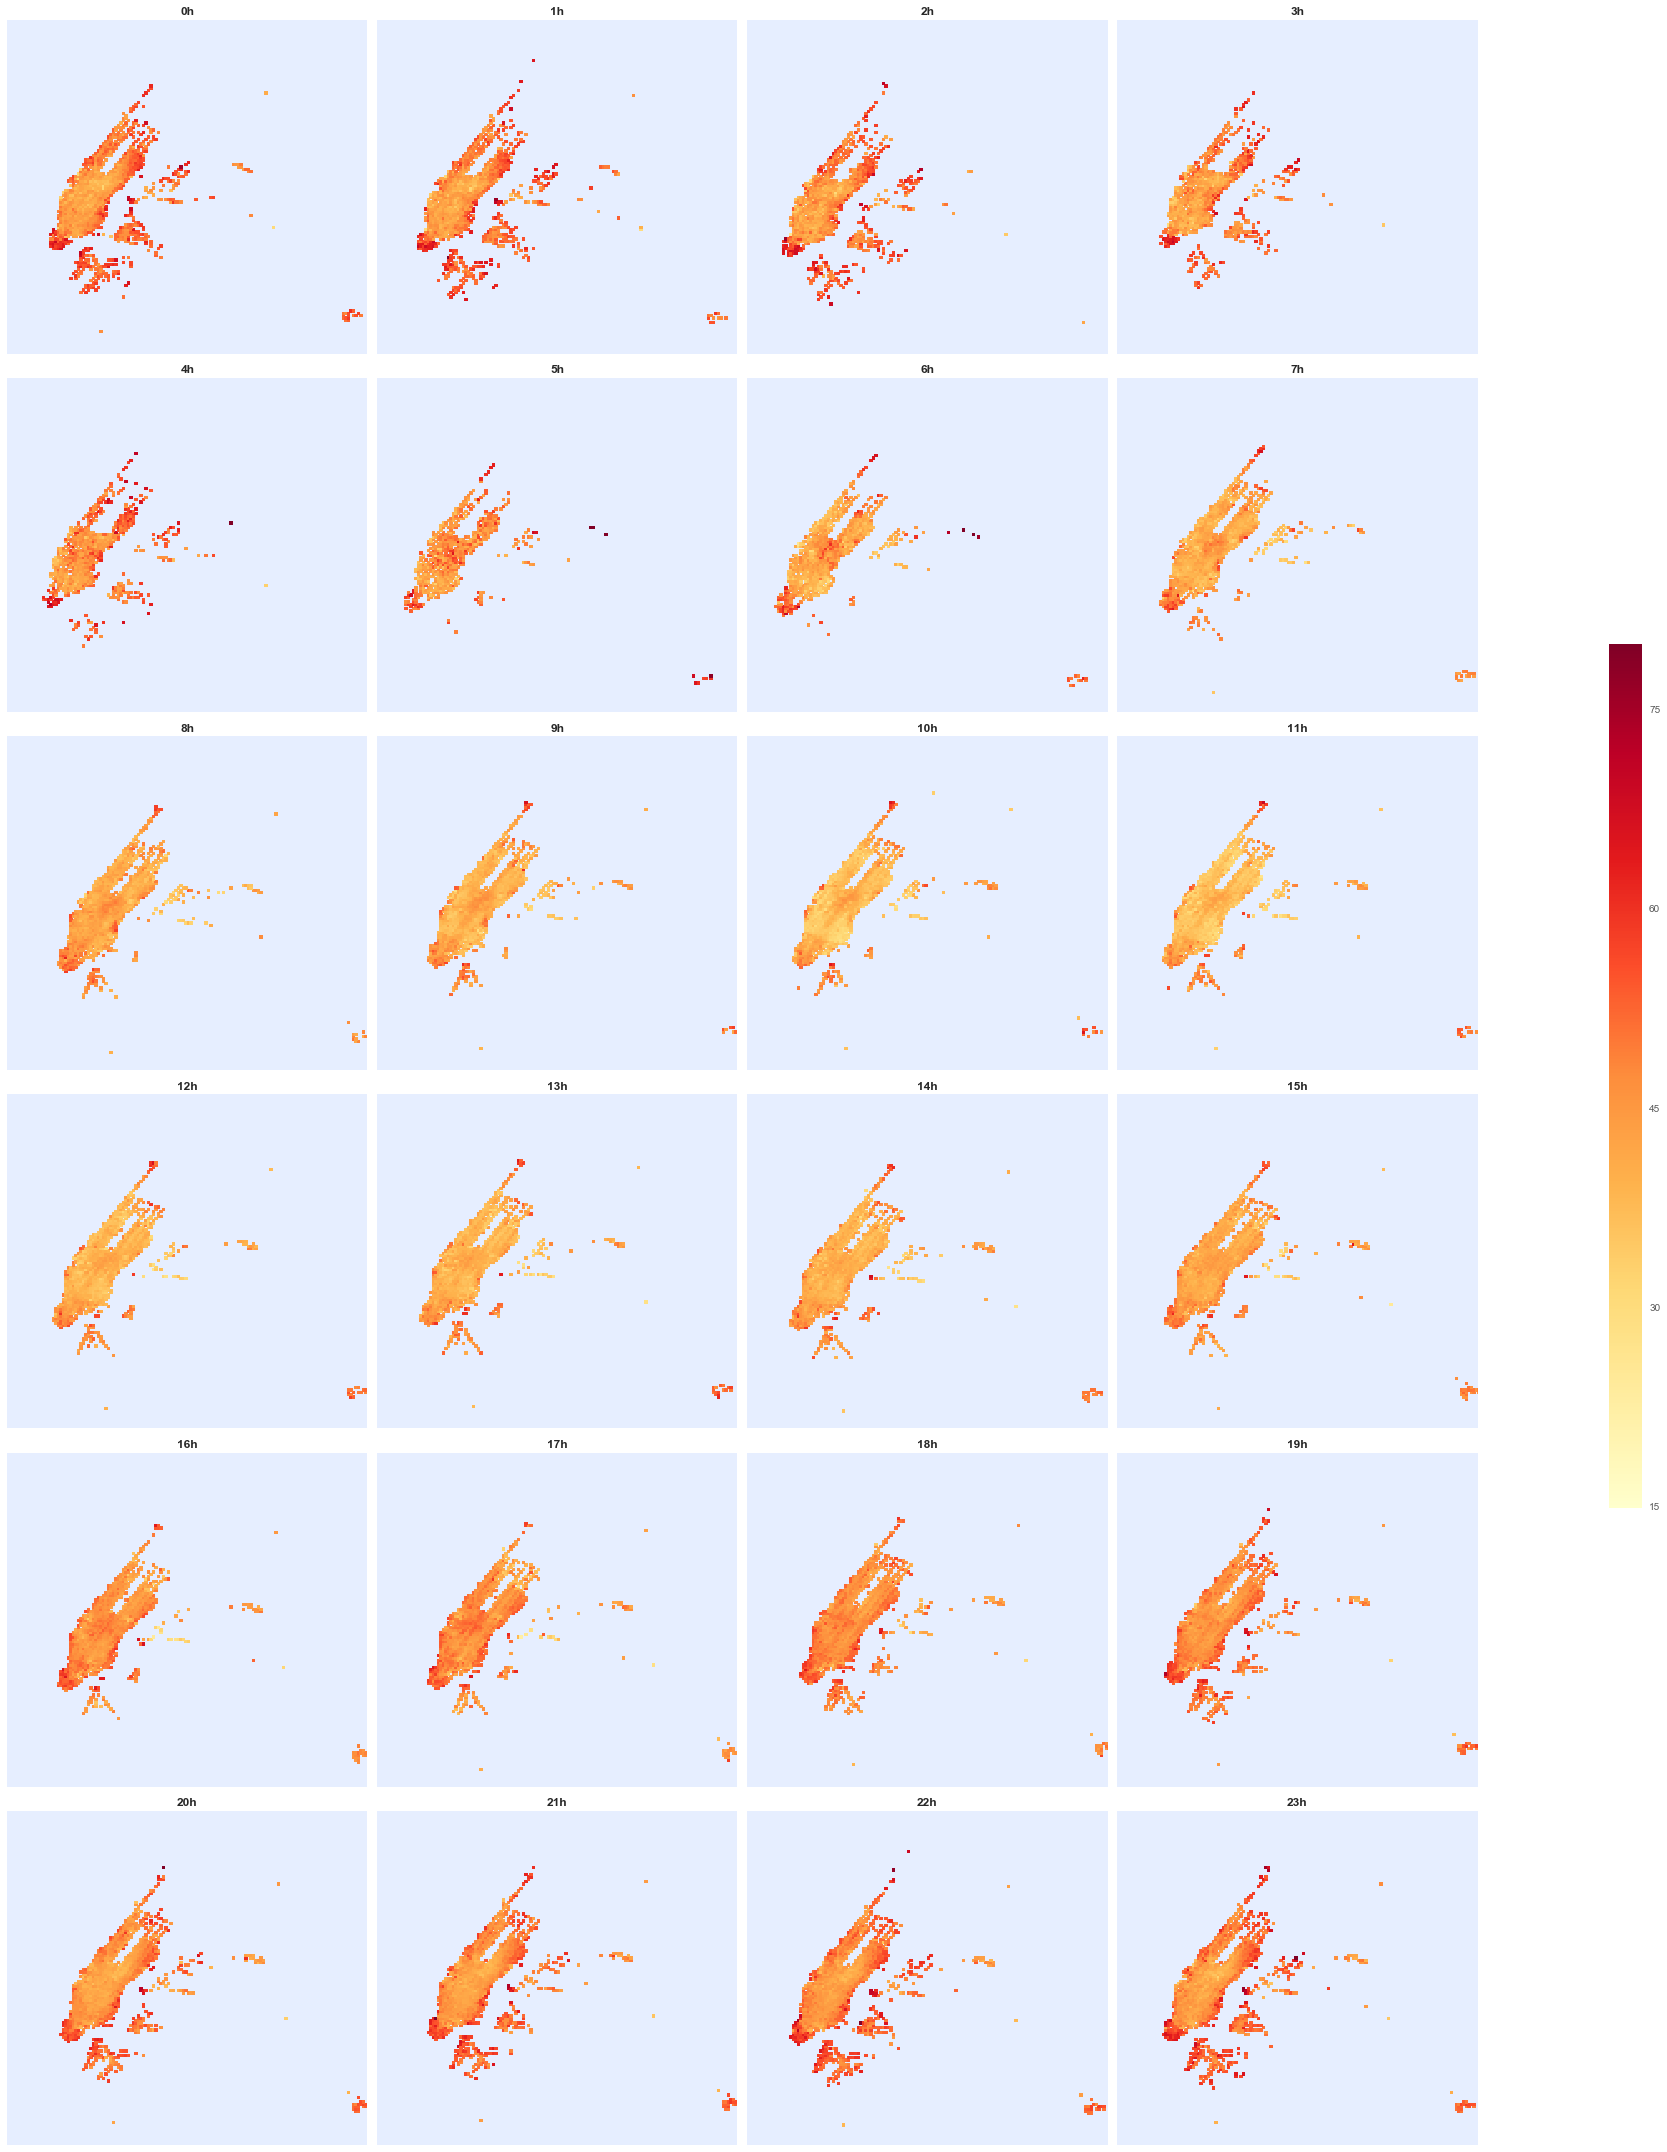

In [192]:
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(new_bth, col='pu_time', dropna=False, col_wrap=4, size=5, aspect=8.0/7.0)
    
    cbar_ax = g.fig.add_axes([.98, .3, .02, .4])
    g = g.map_dataframe(facet, cbar_ax=cbar_ax, vmax=80, vmin=15)

g.set_titles(col_template="{col_name}"+"h", fontweight='bold', fontsize=24)
g.fig.subplots_adjust(right=.9)

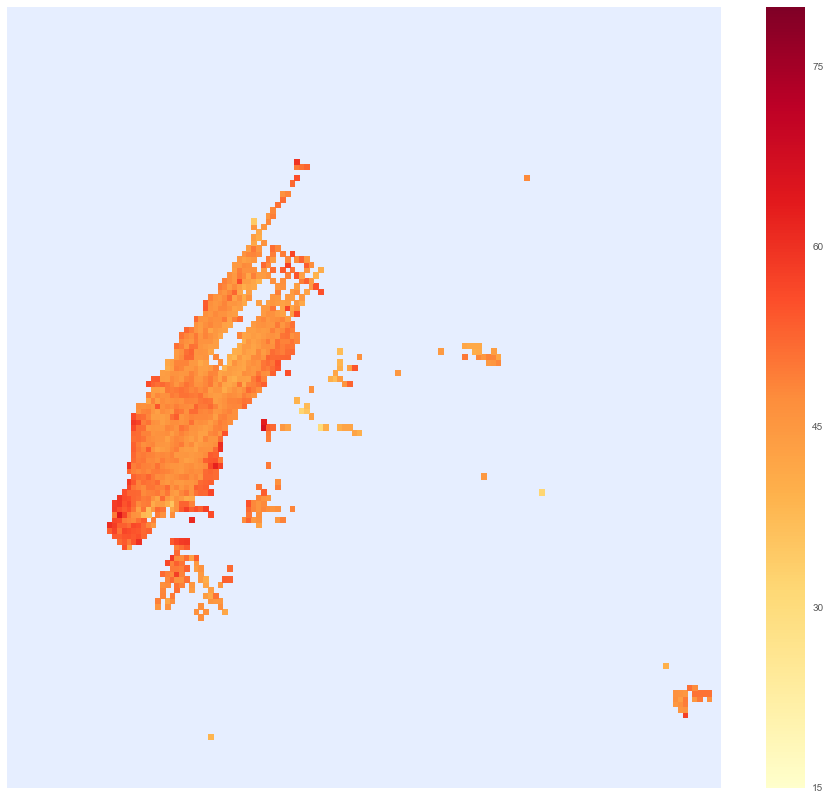

In [187]:
rcParams['figure.figsize'] = (16,14)

exp = new_bth[new_bth['pu_time']==18].pivot(index='pu_lat', columns='pu_lon', values='trip_value').iloc[::-1]
g = sns.heatmap(exp, cmap='YlOrRd',vmax = 80, vmin=15)
g.axes.get_yaxis().set_visible(False)
g.axes.get_xaxis().set_visible(False)
g.patch.set_facecolor('#e6eeff')

In [24]:
grouped_hour = ds.groupby([ds.pu_time.map(lambda x: x.hour)])

In [25]:
grouped_day  = ds.groupby([ds.pu_time.map(lambda x: x.day)])

In [26]:
grouped_weekday = ds.groupby([ds.pu_time.map(lambda x: x.weekday())])

In [28]:
cashbyhour = grouped_hour['trip_value'].aggregate([np.mean,np.std])

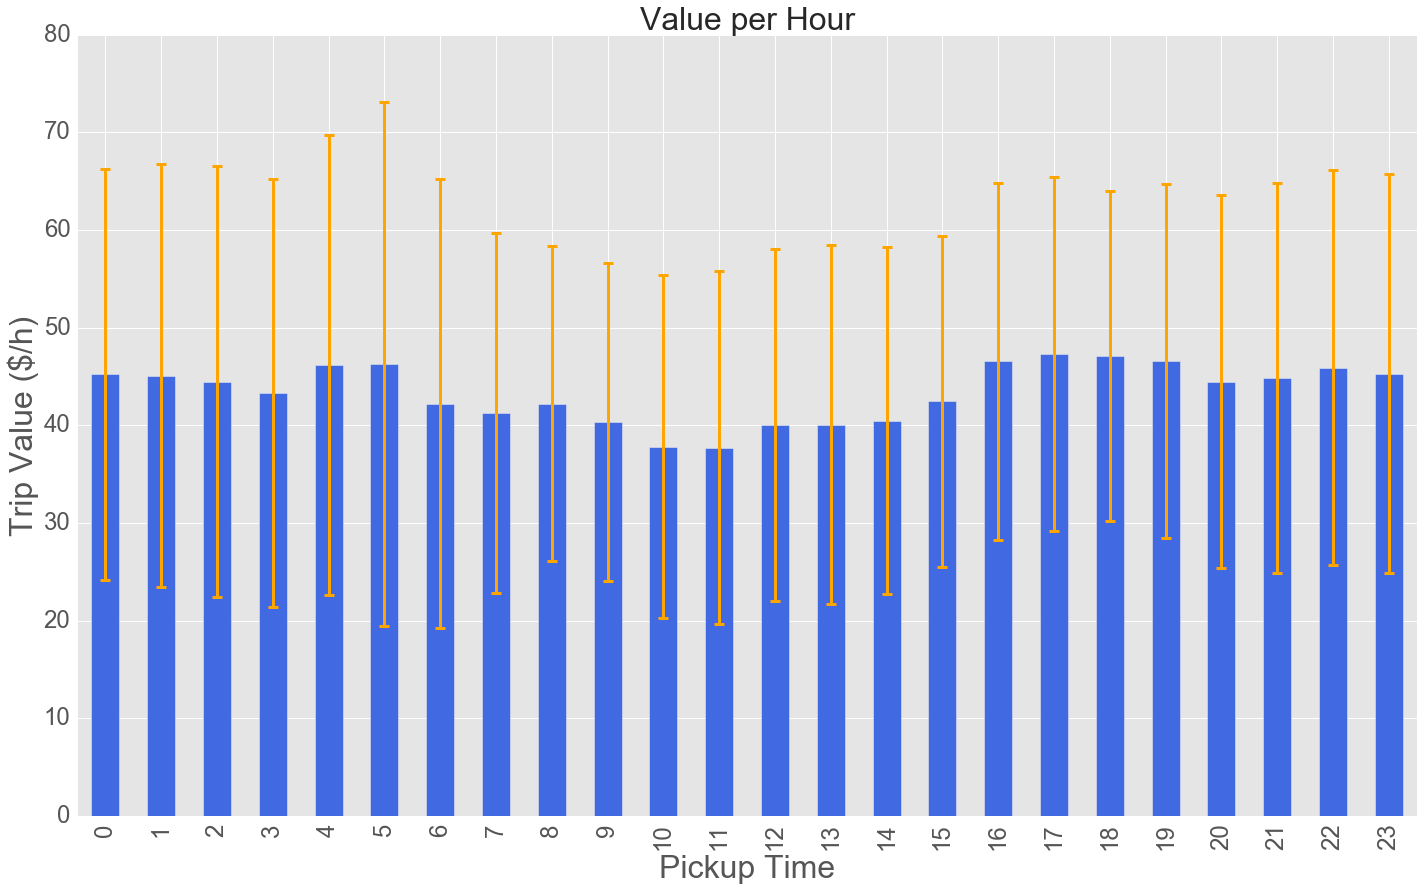

In [197]:
rcParams['figure.figsize'] = (24,14)
ax = cashbyhour.plot.bar(y='mean', yerr='std',color = 'royalblue', fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_xlabel('Pickup Time', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Hour',fontsize=32)

In [30]:
valuebyday = grouped_day['trip_value'].aggregate([np.mean,np.std])

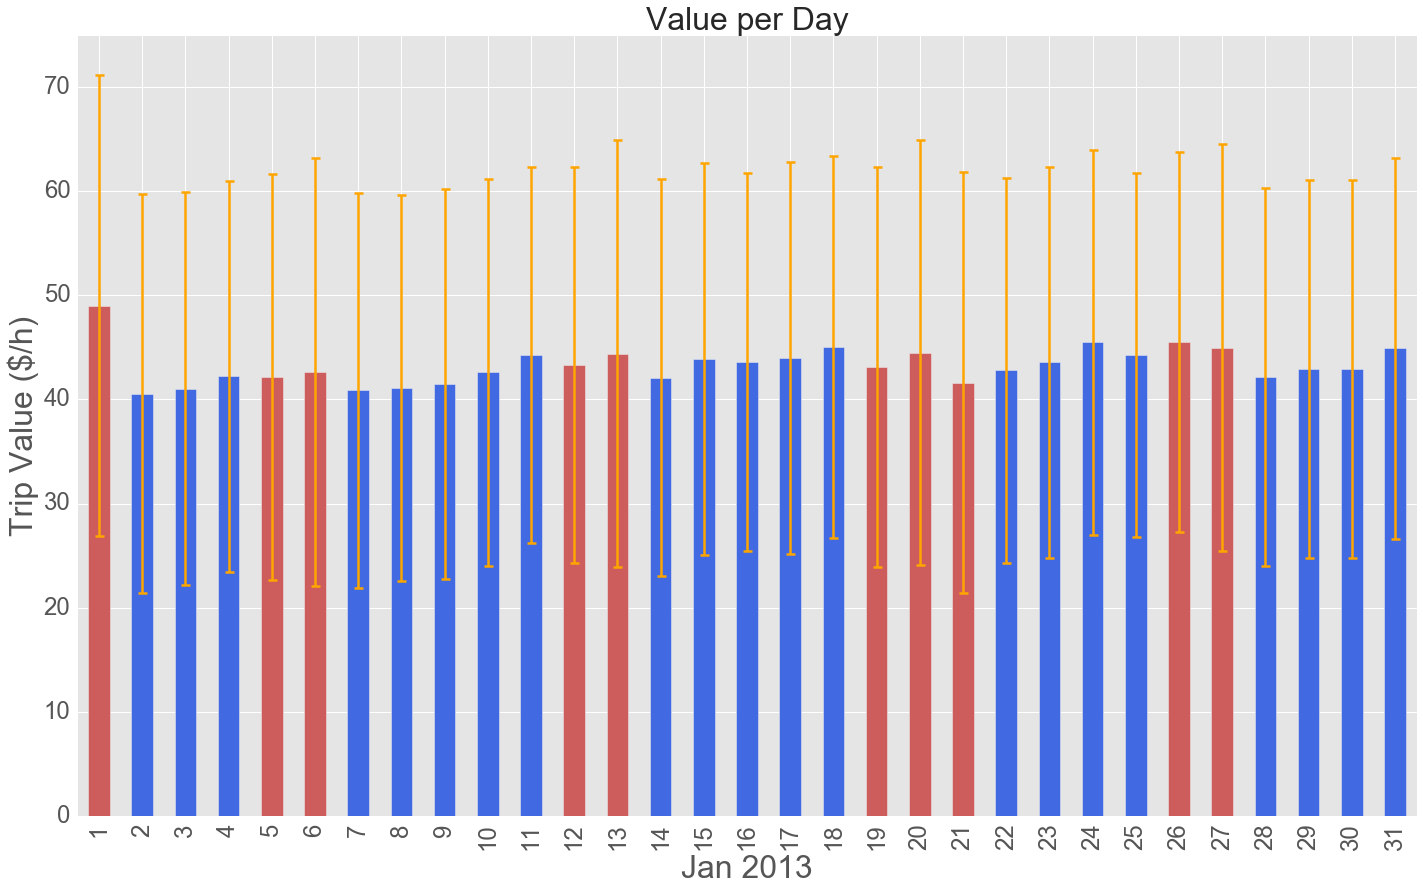

In [204]:
rcParams['figure.figsize'] = (24,14)

mycolor = []
for x in range(1,len(valuebyday.index)+1):
    if x in holidays:
        mycolor.append('indianred')
    else:
        mycolor.append('royalblue')

ax = valuebyday.plot.bar(y='mean', yerr='std',color = mycolor, fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=2.5, capsize=4.5, capthick=2.5))
ax.set_ylim(0,75)
ax.set_xlabel('Jan 2013', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Day', fontsize = 32)

In [33]:
valuebyweekday = grouped_weekday['trip_value'].aggregate([np.mean,np.std])

In [37]:
valuebyweekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [38]:
valuebyweekday

,mean,std
Mon,41.708631,19.062076
Tue,43.771025,19.309356
Wed,42.555319,18.600317
Thu,43.726723,18.669470
Fri,44.005410,18.156898
Sat,43.613374,19.019066
Sun,44.187521,20.239893


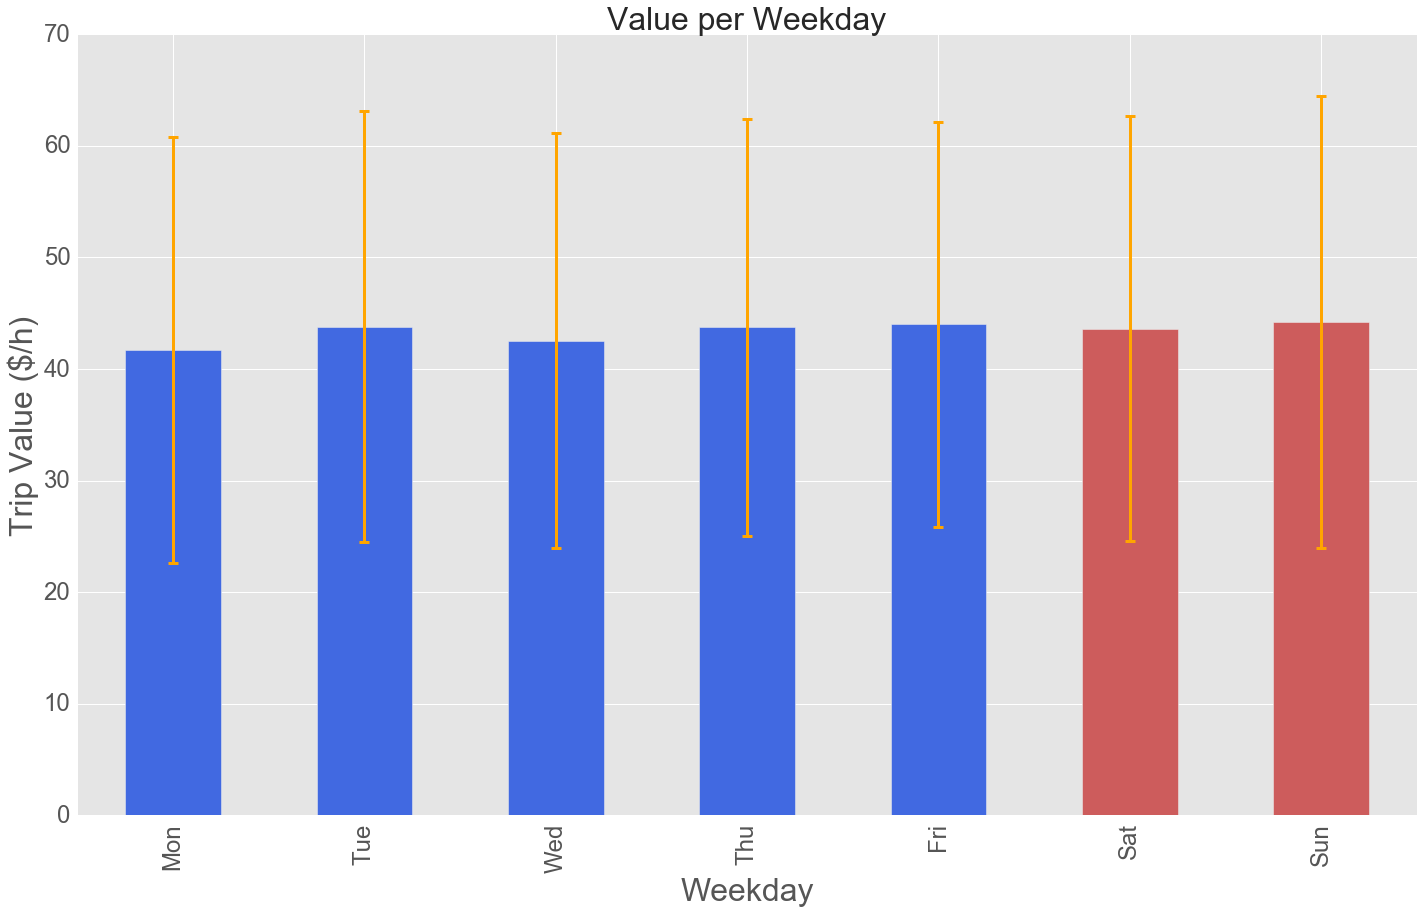

In [207]:
rcParams['figure.figsize'] = (24,14)

mycolor = []
for x in range(len(valuebyweekday.index)):
    if x==5 or x==6:
        mycolor.append('indianred')
    else:
        mycolor.append('royalblue')

ax = valuebyweekday.plot.bar(y='mean', yerr='std',color = mycolor, fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_xlabel('Weekday', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Weekday',fontsize=32)

In [40]:
waitbyhour = grouped_hour['wait_seconds'].aggregate([np.mean,np.std])

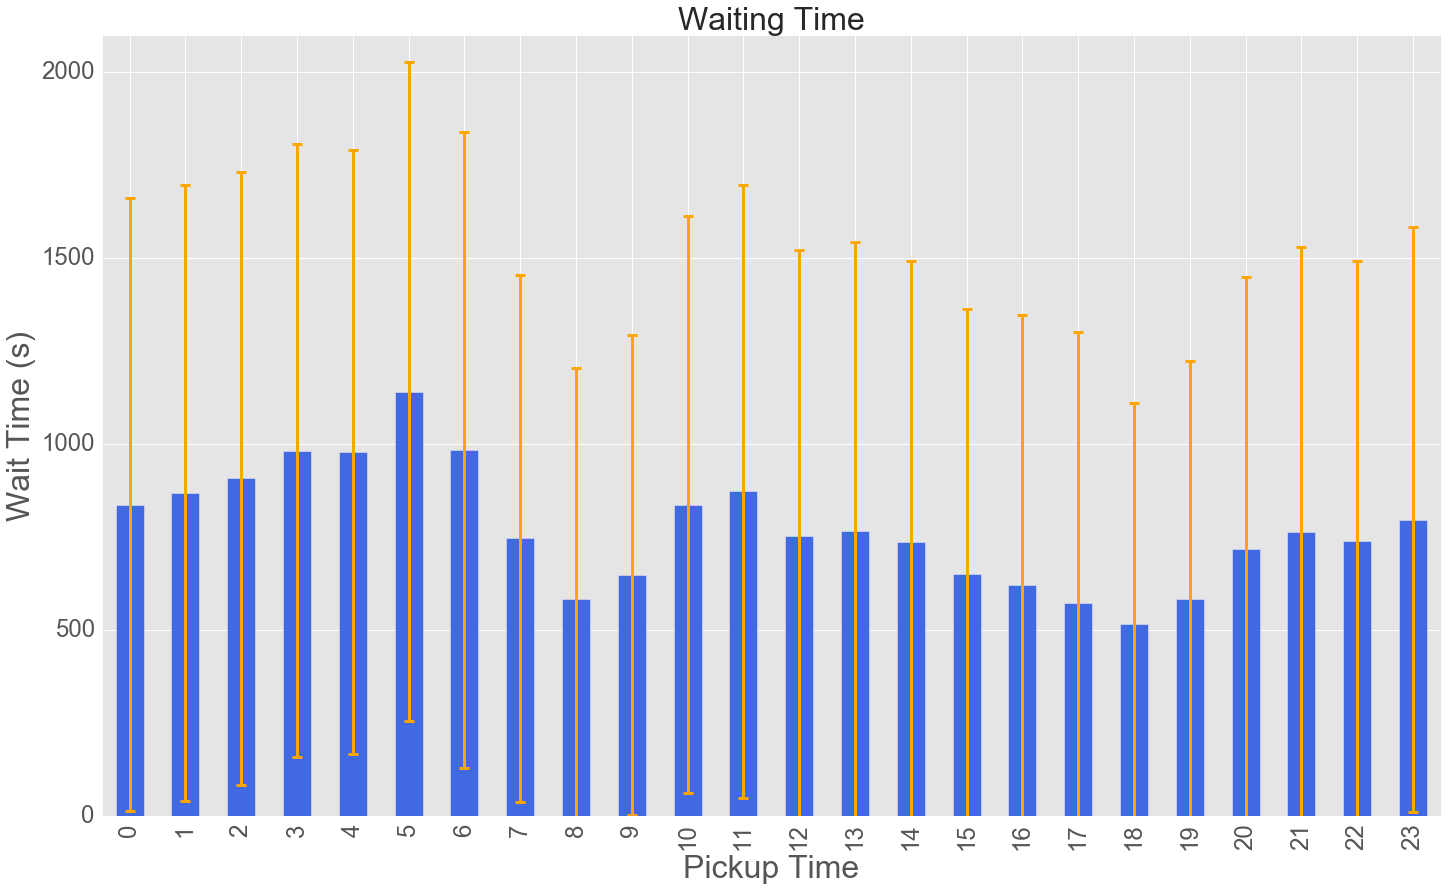

In [208]:
rcParams['figure.figsize'] = (24,14)
ax = waitbyhour.plot.bar(y='mean', yerr='std',color = 'royalblue', fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_ylim(0,2100)
ax.set_xlabel('Pickup Time', fontsize = 32)
ax.set_ylabel('Wait Time (s)', fontsize = 32)
ax.set_title('Waiting Time',fontsize=32)

In [43]:
ds.wait_seconds.describe()

count    10273145.000000
mean          721.424048
std           747.031828
min             0.000000
25%           180.000000
50%           454.000000
75%          1000.000000
max          3599.000000
Name: wait_seconds, dtype: float64

In [149]:
ds_new = ds[ds.wait_seconds<1800]

In [150]:
len(ds_new)

9214463

In [151]:
ds_new.wait_seconds.describe()

count    9214463.000000
mean         518.868734
std          441.471459
min            0.000000
25%          162.000000
50%          372.000000
75%          780.000000
max         1799.000000
Name: wait_seconds, dtype: float64

In [152]:
grouped_hour_new = ds_new.groupby([ds_new.pu_time.map(lambda x: x.hour)])

In [153]:
waitbyhour_new = grouped_hour_new['wait_seconds'].agg([np.mean,np.std])

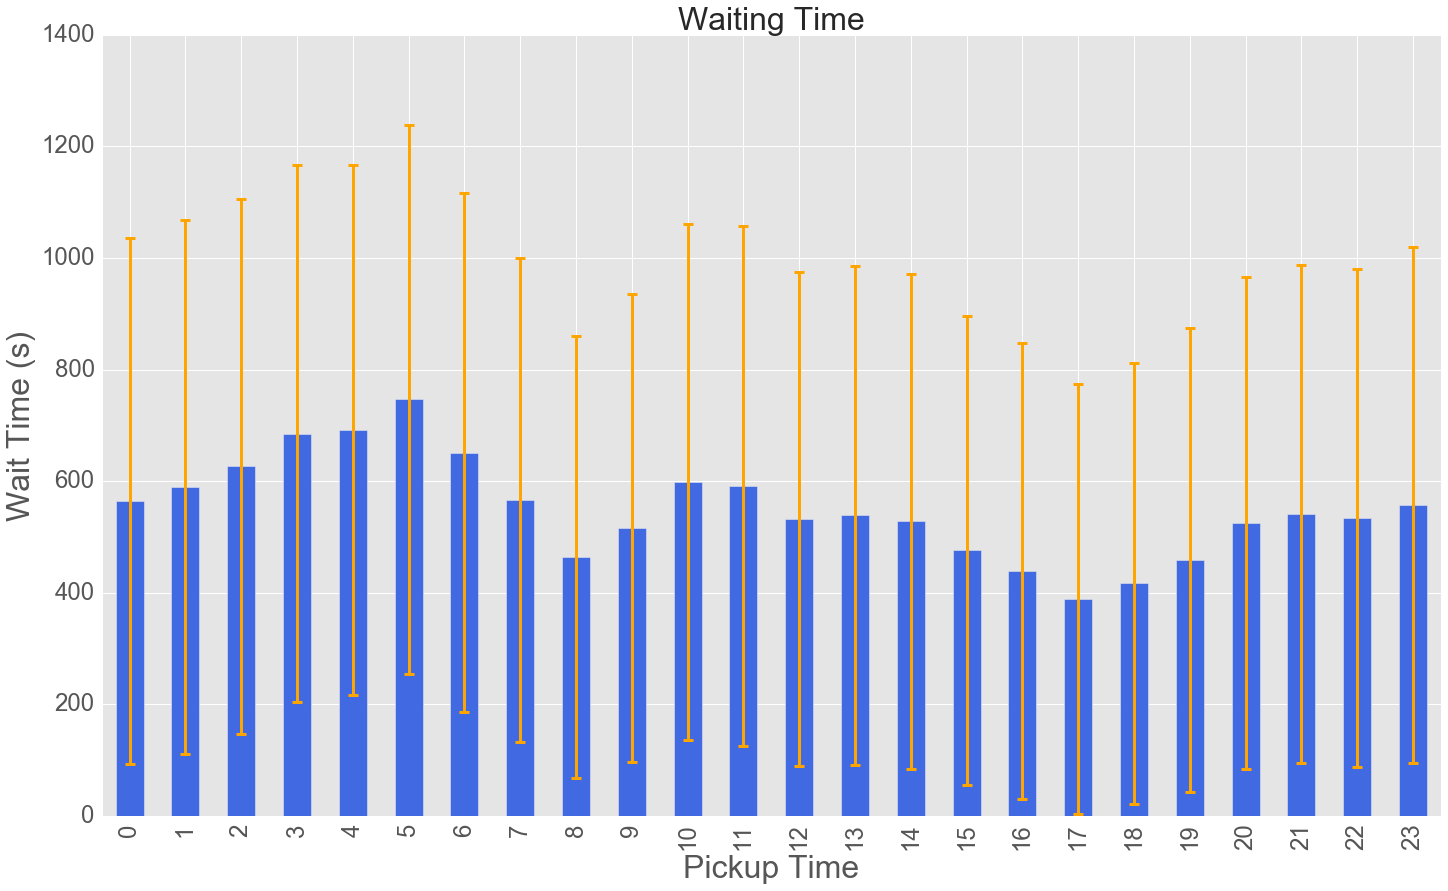

In [209]:
rcParams['figure.figsize'] = (24,14)
ax = waitbyhour_new.plot.bar(y='mean', yerr='std',color = 'royalblue', fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_xlabel('Pickup Time', fontsize = 32)
ax.set_ylabel('Wait Time (s)', fontsize = 32)
ax.set_title('Waiting Time',fontsize=32)

In [155]:
valuebyhour_new = grouped_hour_new['trip_value'].agg([np.mean,np.std])

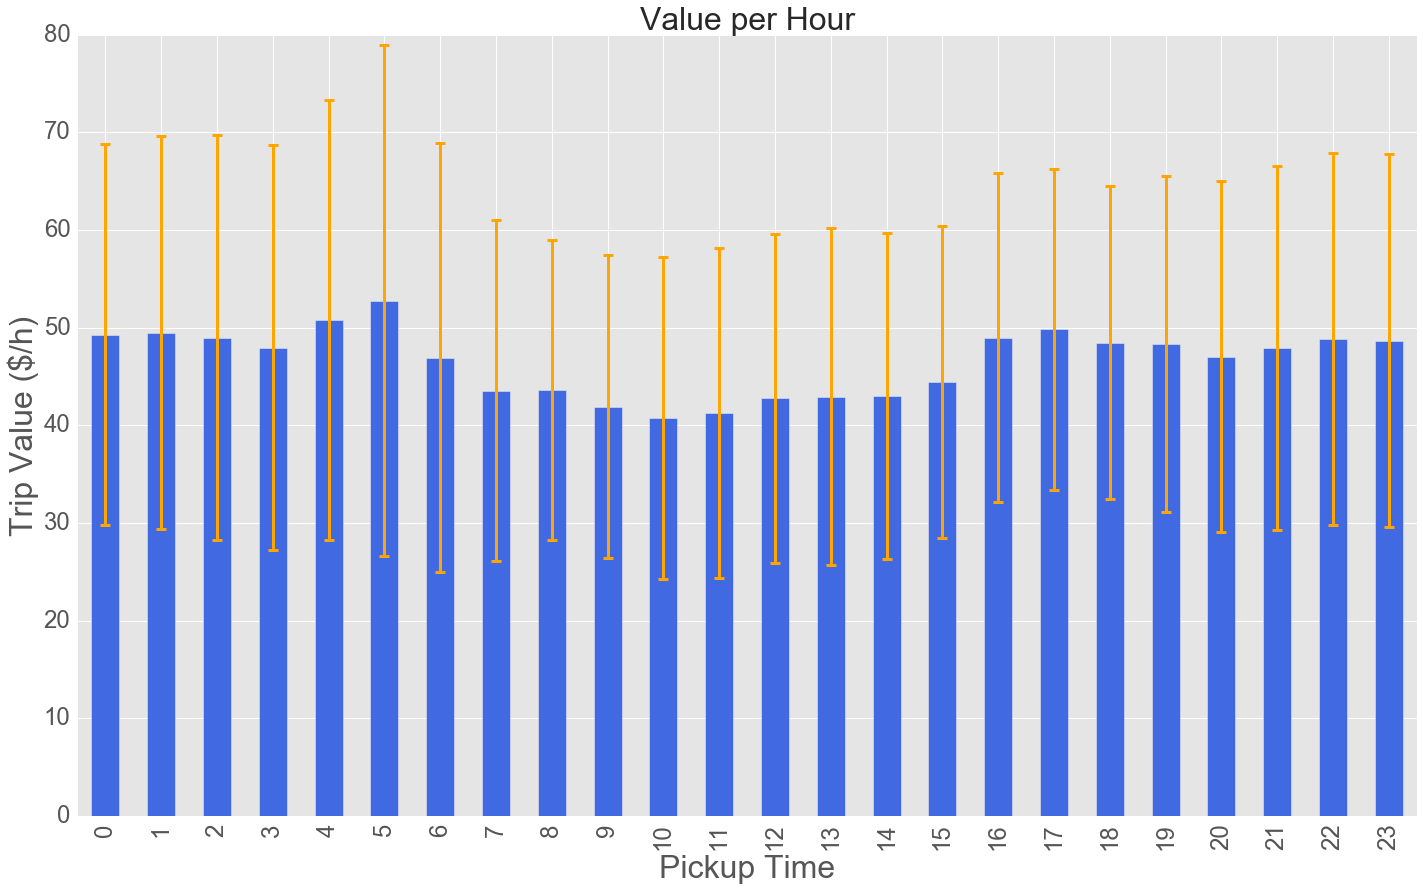

In [210]:
rcParams['figure.figsize'] = (24,14)
ax = valuebyhour_new.plot.bar(y='mean', yerr='std',color = 'royalblue', fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_xlabel('Pickup Time', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Hour',fontsize=32)

In [157]:
grouped_day_new  = ds_new.groupby([ds_new.pu_time.map(lambda x: x.day)])

In [158]:
grouped_weekday_new  = ds_new.groupby([ds_new.pu_time.map(lambda x: x.weekday())])

In [159]:
valuebyday_new = grouped_day_new['trip_value'].aggregate([np.mean,np.std])

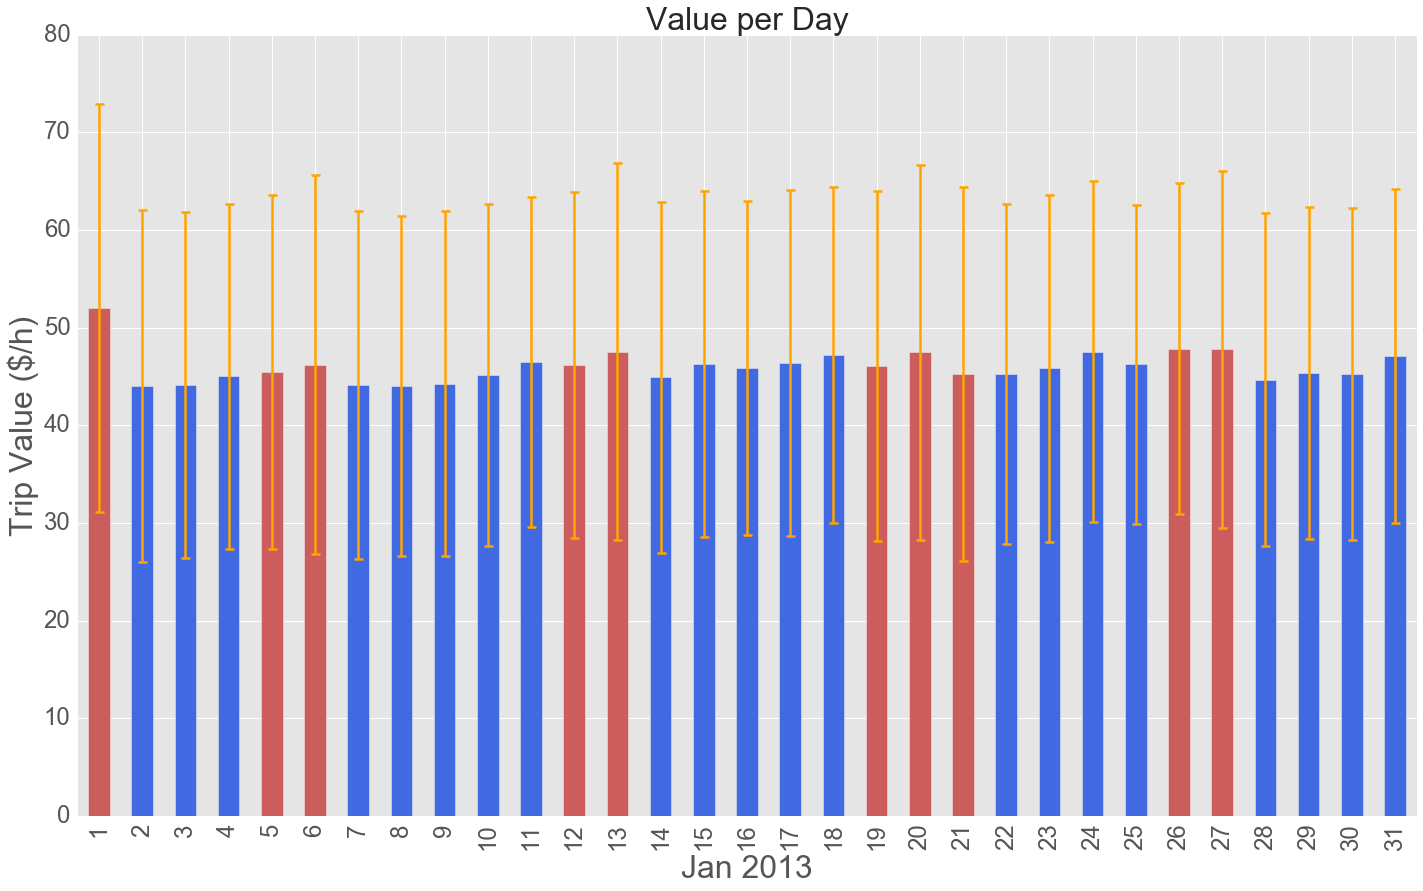

In [211]:
rcParams['figure.figsize'] = (24,14)

mycolor = []
for x in range(1,len(valuebyday_new.index)+1):
    if x in holidays:
        mycolor.append('indianred')
    else:
        mycolor.append('royalblue')

ax = valuebyday_new.plot.bar(y='mean', yerr='std',color = mycolor, fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=2.5, capsize=4.5, capthick=2.5))
ax.set_xlabel('Jan 2013', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Day', fontsize = 32)

In [161]:
valuebyweekday_new = grouped_weekday_new['trip_value'].aggregate([np.mean,np.std])
valuebyweekday_new.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

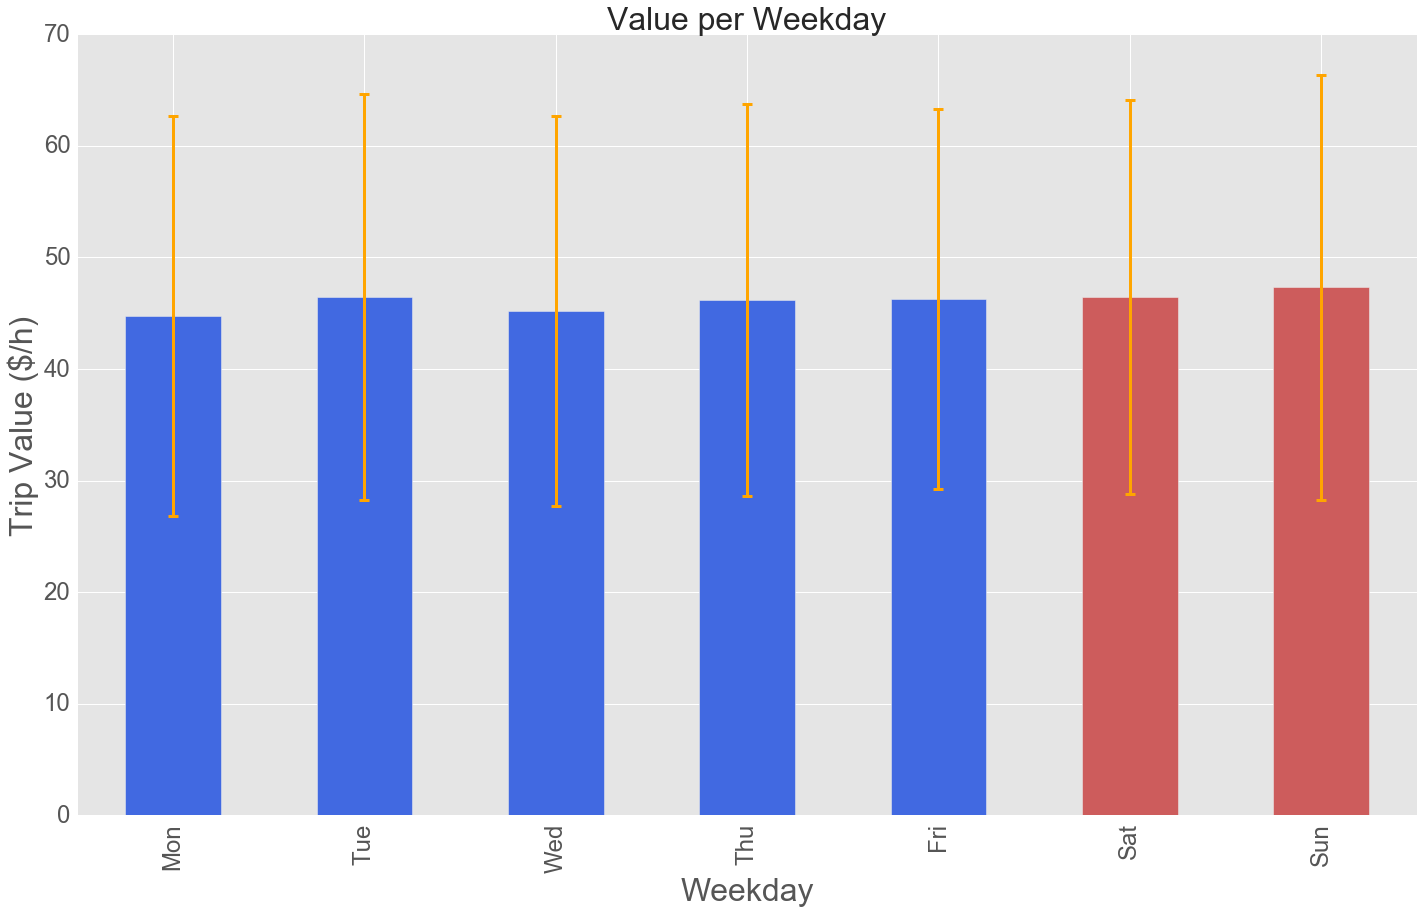

In [212]:
rcParams['figure.figsize'] = (24,14)

mycolor = []
for x in range(len(valuebyweekday_new.index)):
    if x==5 or x==6:
        mycolor.append('indianred')
    else:
        mycolor.append('royalblue')

ax = valuebyweekday_new.plot.bar(y='mean', yerr='std',color = mycolor, fontsize = 24, legend=False,\
                         error_kw=dict(ecolor='orange', lw=3, capsize=5, capthick=3))
ax.set_xlabel('Weekday', fontsize = 32)
ax.set_ylabel('Trip Value ($/h)', fontsize = 32)
ax.set_title('Value per Weekday',fontsize=32)

In [165]:
bythehour_new = ds_new.groupby([ds_new.pu_time.map(lambda x: x.hour),pd.cut(ds_new.pu_lat,150),pd.cut(ds_new.pu_lon,150)])
new_bth_new = bythehour_new.aggregate({'trip_value':lambda x: x.mean() if x.count()>20 else np.nan}).reset_index()

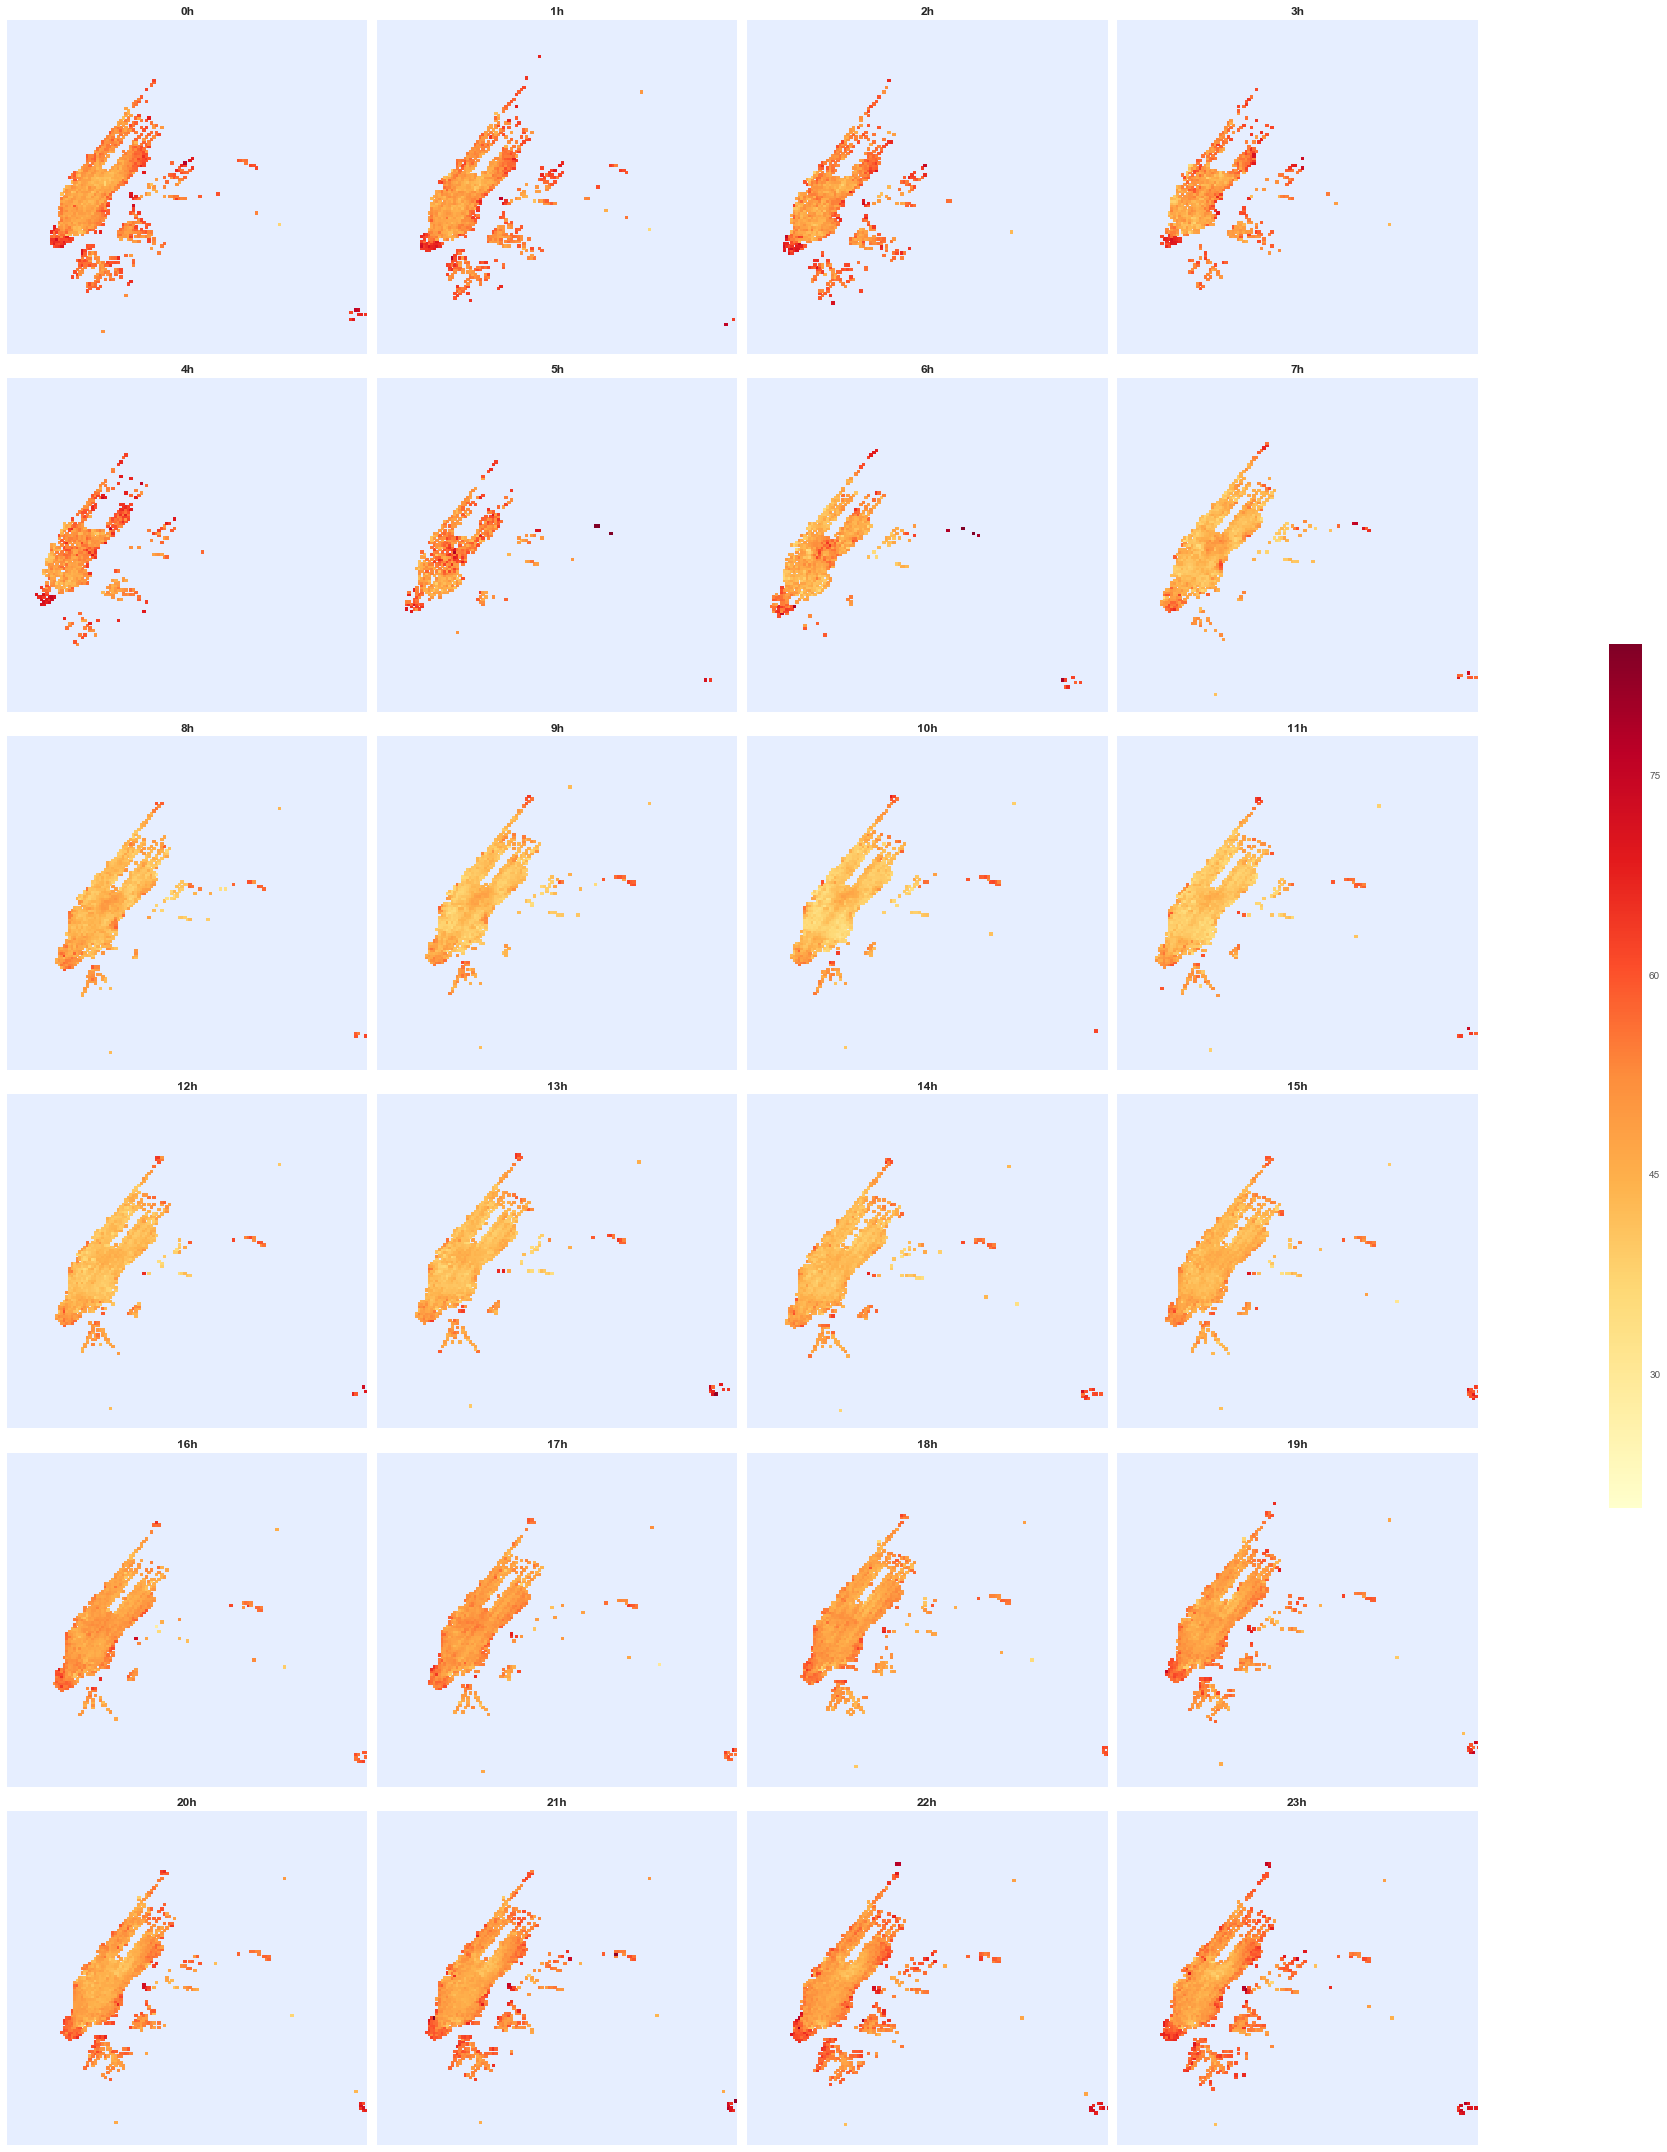

In [191]:
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(new_bth_new, col='pu_time', dropna=False, col_wrap=4, size=5, aspect=8.0/7.0)
    
    cbar_ax = g.fig.add_axes([.98, .3, .02, .4])
    g = g.map_dataframe(facet, cbar_ax=cbar_ax, vmax=85, vmin=20)

g.set_titles(col_template="{col_name}"+"h", fontweight='bold', fontsize=24)
g.fig.subplots_adjust(right=.9)